## 多項式回帰によるsin関数の実装

ここでは多項式回帰を使って元データからデータが従うであろう  
曲線（sinカーブ）を見出せることを確かめる。本実装を通じて  
sklearnが提供するメソッドを使いこなせるようになりたい。

In [7]:
#ライブラリをインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

元データの生成（sin関数＋ノイズの作成）と多項式変換

In [8]:
#sin関数にノイズを加えて訓練用データ（X, y）を生成
np.random.seed(seed=8) #乱数を固定
X = np.random.uniform(0, 4, 15)[:, np.newaxis] #0〜4の実数値15個ランダムにとってXに格納、Xは一様分布に従う
y = np.sin(1/4 * 2 * np.pi * X).ravel() + np.random.normal(0, 0.3, 15) #sin関数に正規分布(0, 0.3^2)に従う誤差を加算

#特徴量の多項式変換
POLY = PolynomialFeatures(degree=3, include_bias=False) #3次多項式に変換
X_pol = POLY.fit_transform(X) #訓練用データを変換

線形モデルの訓練（3次多項式）

In [9]:
#線形回帰モデルを作成
model = LinearRegression()

#多項式変換した特徴量と正解を用いてモデルの訓練
model.fit(X_pol, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

真のsin関数、多項式回帰曲線、元データ散布図のプロット

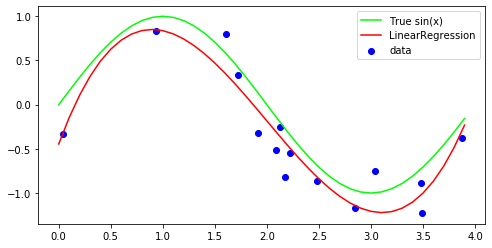

In [10]:
plt.figure(figsize=(8,4)) #プロットのサイズ指定

#プロット用にデータX_pltを作成
X_plt = np.arange(0, 4, 0.1)[:, np.newaxis] #0〜4を0.1刻みでX_pltに格納
#正解のプロット
y_true = np.sin(1/4 * 2 * np.pi * X_plt).ravel()
#予測モデルのプロット
y_pred = model.predict(POLY.transform(X_plt))

#sin関数の線形回帰によるモデル化
plt.scatter(X, y, color='blue', label='data') #生データを散布図でプロット
plt.plot(X_plt, y_true, color='lime', linestyle='-', label='True sin(x)') #真のsin関数をプロット
plt.plot(X_plt, y_pred, color='red', linestyle='-', label='LinearRegression') #予測モデルをプロット
plt.legend(loc='upper right')

plt.show()

LinearRegressionの曲線（赤）によって、真のsin関数（緑）の振る舞いを  
良く表現できていることが確かめられた。

線形モデルの訓練（6次多項式）

In [11]:
#6次多項式に変換
POLY2 = PolynomialFeatures(degree=6, include_bias=False)
X_pol2 = POLY2.fit_transform(X)

#多項式変換した特徴量と正解データを用いて学習
model2 = LinearRegression()
model2.fit(X_pol2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

真のsin関数、多項式回帰曲線、元データ散布図のプロット

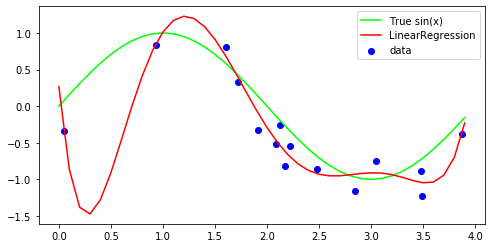

In [12]:
plt.figure(figsize=(8,4)) #サイズを指定

#プロット用のデータを作成
X_plt = np.arange(0, 4, 0.1)[:, np.newaxis] #0〜4を0.1刻みでX_pltに格納
#正解のプロット
y_true2 = np.sin(1/4 * 2 * np.pi * X_plt).ravel() #真のsin関数をプロット
#予測モデルのプロット
y_pred2 = model2.predict(POLY2.transform(X_plt)) #多項式回帰曲線をプロット

#散布図、曲線のお絵かき
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_true2, color='lime', linestyle='-', label='True sin(x)')
plt.plot(X_plt, y_pred2, color='red', linestyle='-', label='LinearRegression')
plt.legend(loc='upper right')

plt.show()

X > 2.0の領域から、学習データに引っ張られてる様子がわかる。  
これがいわゆる「過学習」の状態である。

線形モデルの訓練（9次多項式）

In [13]:
#9次多項式に変換
POLY3 = PolynomialFeatures(degree=9, include_bias=False)
X_pol3 = POLY3.fit_transform(X)

#多項式変換した特徴量と正解データを用いて学習
model3 = LinearRegression()
model3.fit(X_pol3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

真のsin関数、多項式回帰曲線、元データ散布図のプロット

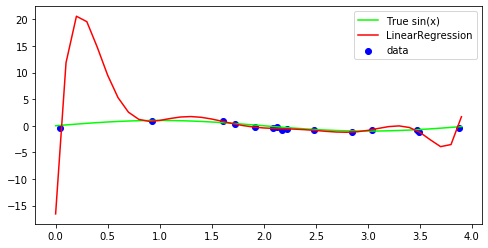

In [14]:
plt.figure(figsize=(8,4))

y_true3 = np.sin(1/4 * 2 * np.pi * X_plt).ravel()
y_pred3 = model3.predict(POLY3.transform(X_plt))

plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_true3, color='lime', linestyle='-', label='True sin(x)')
plt.plot(X_plt, y_pred3, color='red', linestyle='-', label='LinearRegression')
plt.legend(loc='upper right')

plt.show()

LinearRegressionの曲線が元データの点を全て通っている。  
これは、データの自由度（=9）と回帰係数のランクが一致しており  
学習データについて残差平方和が0となっているからである。

ここまでは汎化性能の良し悪しを回帰曲線の見た目からフィーリングで判断していた。  
これはサイエンスに臨む上で正しい姿勢ではないので、定量的な尺度で判断を  
する方法を紹介する。

## MSE計算による汎化性能の評価

ここでは多項式回帰の次数に依存した汎化性能の評価を定量的に  
行う方法を学ぶ。その方法として、平均二乗平方根誤差RMSを  
計算するというものがある。RMSは式(1.3)で定義される。  
以下では、生成したデータを訓練用、テスト用に分けたうえで  
それぞれのRMSを計算することで、汎化性能の評価をしたい。

In [15]:
#ライブラリのインポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
#sin関数にノイズを加えてデータ（X, y）を生成
np.random.seed(seed=8) #乱数を固定
X = np.random.uniform(0, 4, 20)[:, np.newaxis] #0〜4の実数値20個ランダムにとってXに格納、Xは一様分布に従う
y = np.sin(1/4 * 2 * np.pi * X).ravel() + np.random.normal(0, 0.3, 20) #sin関数に正規分布(0, 0.3^2)に従う誤差を加算

#学習用とテスト用データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16, 1) (4, 1) (16,) (4,)


In [6]:
#特徴量の多項式変換
POLY1 = PolynomialFeatures(degree=3, include_bias=False) #3次多項式に変換
X_train_pol1 = POLY1.fit_transform(X_train) #訓練用データを変換
X_test_pol1 = POLY1.transform(X_test) #テスト用データを変換

POLY2 = PolynomialFeatures(degree=6, include_bias=False) #6次多項式に変換
X_train_pol2 = POLY2.fit_transform(X_train) #訓練用データを変換
X_test_pol2 = POLY2.transform(X_test) #テスト用データを変換

POLY3 = PolynomialFeatures(degree=9, include_bias=False) #9次多項式に変換
X_train_pol3 = POLY3.fit_transform(X_train) #訓練用データを変換
X_test_pol3 = POLY3.transform(X_test) #テスト用データを変換

print(X_train_pol1.shape, X_train_pol2.shape, X_train_pol3.shape)

(16, 3) (16, 6) (16, 9)


In [21]:
#特徴量の標準化

#1次
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) #訓練データを標準化
X_test_std = sc.transform(X_test) #テストデータを標準化

#3次
sc1 = StandardScaler()
X_train_pol1_std = sc1.fit_transform(X_train_pol1) #訓練データを標準化
X_test_pol1_std = sc1.transform(X_test_pol1) #テストデータを標準化

#6次
sc2 = StandardScaler()
X_train_pol2_std = sc2.fit_transform(X_train_pol2) #訓練データを標準化
X_test_pol2_std = sc2.transform(X_test_pol2) #テストデータを標準化

#9次
sc3 = StandardScaler()
X_train_pol3_std = sc3.fit_transform(X_train_pol3) #訓練データを標準化
X_test_pol3_std = sc3.transform(X_test_pol3) #テストデータを標準化

In [22]:
#線形回帰モデルの作成
model = LinearRegression()
model.fit(X_train_std, y_train) #1次

#線形回帰モデルの作成
model1 = LinearRegression()
model1.fit(X_train_pol1_std, y_train) #3次

#線形回帰モデルの作成
model2 = LinearRegression()
model2.fit(X_train_pol2_std, y_train) #6次

#線形回帰モデルの作成
model3 = LinearRegression()
model3.fit(X_train_pol3_std, y_train) #9次

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

メモ：同じ線形モデルなのだからmodel=LinearRegression()を使い回ししても  
　　　良いだろうと思ったが、そうするとエラーを吐かれた。なぜだ。

In [23]:
#予測値の作成
#1次
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

#3次
y_train_pred1 = model1.predict(X_train_pol1_std)
y_test_pred1 = model1.predict(X_test_pol1_std)

#6次
y_train_pred2 = model2.predict(X_train_pol2_std)
y_test_pred2 = model2.predict(X_test_pol2_std)

#9次
y_train_pred3 = model3.predict(X_train_pol3_std)
y_test_pred3 = model3.predict(X_test_pol3_std)

#MSEの計算
print('MSE train: %.2f, test: %.2f' %(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MSE1 train: %.2f, test: %.2f' %(
        mean_squared_error(y_train, y_train_pred1),
        mean_squared_error(y_test, y_test_pred1)))
print('MSE2 train: %.2f, test: %.2f' %(
        mean_squared_error(y_train, y_train_pred2),
        mean_squared_error(y_test, y_test_pred2)))
print('MSE3 train: %.2f, test: %.2f' %(
        mean_squared_error(y_train, y_train_pred3),
        mean_squared_error(y_test, y_test_pred3)))

MSE train: 0.26, test: 0.19
MSE1 train: 0.07, test: 0.04
MSE2 train: 0.04, test: 0.03
MSE3 train: 0.03, test: 0.48


RMSの数だけ見ると次のようなことが言えそう。  
・1次；学習不足  
・3次；good  
・6次；good  
・9次；過学習  
6次の汎化性能が良いということが、曲線のプロットとは感覚が合わない。  
曲線の見た目とRMSの両方を見て汎化性能を判断するべしということか？

## 検算；M=15としたときtrainのRMSが0になることを確かめる。

In [17]:
#特徴量の多項式変換
POLY4 = PolynomialFeatures(degree=15, include_bias=False) #9次多項式に変換
X_train_pol4 = POLY4.fit_transform(X_train) #訓練用データを変換
X_test_pol4 = POLY4.transform(X_test) #テスト用データを変換

In [18]:
#特徴量の標準化
#15次
sc4 = StandardScaler()
X_train_pol4_std = sc4.fit_transform(X_train_pol4) #訓練データを標準化
X_test_pol4_std = sc4.transform(X_test_pol4) #テストデータを標準化

In [19]:
#線形回帰モデルの作成
model4 = LinearRegression()
model4.fit(X_train_pol4_std, y_train) #15次

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#予測値の作成
#9次
y_train_pred4 = model4.predict(X_train_pol4_std)
y_test_pred4 = model4.predict(X_test_pol4_std)

#MSEの計算
print('MSE4 train: %.2f, test: %.2f' %(
        mean_squared_error(y_train, y_train_pred4),
        mean_squared_error(y_test, y_test_pred4)))

MSE4 train: 0.00, test: 7542483.42


trainのRMSが0なることが確かめられた。  
やってることは正しそう。